## Set+1_Descriptive+statistics+Probability+(2)

+ Q 1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

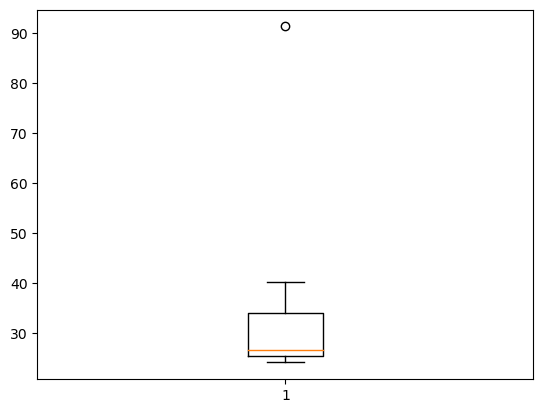

In [2]:
company_name = ['Allied Signal','Bankers Trust','General Mills',
                'ITT Industries','J.P.Morgan & Co.','Lehman Brothers',
                'Marriott', 'MCI','Merrill Lynch','Microsoft','Morgan Stanley',
                'Sun Microsystems','Travelers','US Airways','Warner-Lambert']
measuX_pct = [24.23,25.53,25.41,
                    24.14,29.62,28.25,
                    25.81,24.39,40.26,
                    32.95,91.36,25.99,
                    39.42,26.71,35.00]
box = plt.boxplot(measuX_pct)
plt.show()

+ outlier for X is 91.36 for Morgan Stanley

In [3]:
print(f"The μ value for X is {round(np.mean(measuX_pct),2)}")

The μ value for X is 33.27


In [4]:
print(f"The variance value for X is {round(np.var(measuX_pct),2)}")

The variance value for X is 268.0


In [5]:
print(f"The σ value for X is {round(np.std(measuX_pct),2)}")

The σ value for X is 16.37


## Set+2_Normal+Distribution+Functions+of+random+variables

+ Q1

In [6]:
from scipy.stats import norm

In [7]:
avg = 45 # mean service time
std = 8 # standard deviation in minytes
plan_time = 50 # Taking into account the start delay of 10 mins
z_score = (plan_time-avg)/std
proba = 1-norm.cdf(z_score)
print(f"The Probability that the service manager cannot meet his commitment is {round(proba,5)*100}%")

The Probability that the service manager cannot meet his commitment is 26.599%


+ Q2 A

In [8]:
emp_num = 400 # Total number of employees
mean_age = 38 # Given mean age of employees
std_dev = 6   # Given std of age of employees
z_38 = (38-mean_age)/std_dev # z-value for age = 38
z_44= (44-mean_age)/std_dev  # z-value for age = 44
prob1 = 1-norm.cdf(z_44) # prob dist curve area to right of age 44 (i.e. age > 44)
prob2 = norm.cdf(z_44)-norm.cdf(z_38) # prob dist curve area between age 38 and 44
print(f'''
         Statement that more employees at the processing center are older than 44 than between 38 and 44 is {prob1>prob2}.
         Because probability of employee having age between 38 and 44 is {round(prob2*100,2)} %
         and probability of employee having age more than 44 is {round(prob1*100,2)} %
         ''')


         Statement that more employees at the processing center are older than 44 than between 38 and 44 is False.
         Because probability of employee having age between 38 and 44 is 34.13 %
         and probability of employee having age more than 44 is 15.87 %
         


+ Q2 B

In [9]:
## number of people = emp_num * probabilty that age of employee < 30
z_30 = (30-mean_age)/std_dev # z-value for age = 30
print(f'''The training program for employees under the age of 30
would be expected to attract about {round(emp_num*norm.cdf(z_30))} employees.''')

The training program for employees under the age of 30
would be expected to attract about 36 employees.


+ Q4

In [10]:
# Given values 
mean = 100
std_dev = 20

# Confidence level
confidence_level = 0.99

# Calculate the z-scores for the lower and upper bounds
z_lower = norm.ppf((1 - confidence_level) / 2)
z_upper = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the values a and b
a = mean + z_lower * std_dev
b = mean + z_upper * std_dev

print(f"The values a and b are: a = {a:.2f}, b = {b:.2f}")

The values a and b are: a = 48.48, b = 151.52


+ Q5 a

In [6]:
import scipy.stats as stats

# Given data
mean_profit1 = 5 * 45
variance_profit1 = 9 * (45**2)

mean_profit2 = 7 * 45
variance_profit2 = 16 * (45**2)

# Total profit distribution parameters
mean_total_profit = mean_profit1 + mean_profit2
variance_total_profit = variance_profit1 + variance_profit2
std_dev_total_profit = (variance_total_profit)**0.5

# Confidence level
confidence_level = 0.95

# Calculate the 95% confidence interval
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * std_dev_total_profit
lower_bound = mean_total_profit - margin_of_error
upper_bound = mean_total_profit + margin_of_error

# Display the results
print(f"95% Confidence Interval for Total Annual Profit: ({lower_bound:.2f} Rs. Million, {upper_bound:.2f} Rs. Million)")

95% Confidence Interval for Total Annual Profit: (99.01 Rs. Million, 980.99 Rs. Million)


+ Q5 b

In [7]:
# Given data
mean_profit1 = 5 * 45
variance_profit1 = 9 * (45**2)

mean_profit2 = 7 * 45
variance_profit2 = 16 * (45**2)

# Total profit distribution parameters
mean_total_profit = mean_profit1 + mean_profit2
variance_total_profit = variance_profit1 + variance_profit2
std_dev_total_profit = (variance_total_profit)**0.5

# Calculate the 5th percentile using the inverse CDF (percent-point function)
fifth_percentile = stats.norm.ppf(0.05, loc=mean_total_profit, scale=std_dev_total_profit)

# Display the result
print(f"5th Percentile of Total Annual Profit: {fifth_percentile:.2f} Rs. Million")


5th Percentile of Total Annual Profit: 169.91 Rs. Million


## Set+3 _Topics: Confidence Intervals

+ Q 8

In [4]:
import scipy.stats as stats
import numpy as np
# Function to calculate minimum sample size
def calculate_sample_size(z_score, estimated_proportion, margin_of_error):
    return np.ceil(((z_score**2) * estimated_proportion * (1 - estimated_proportion)) / (margin_of_error**2))

confidence_level = 0.95
margin_of_error = 0.04
z_score = stats.norm.ppf((1 + confidence_level) / 2)  # Two-tailed

estimated_proportion = 0.5  # Since we want to be conservative, assuming maximum variability

sample_size = calculate_sample_size(z_score, estimated_proportion, margin_of_error)
print(f"Minimum sample size: {sample_size}")

Minimum sample size: 601.0


+ Q 9

In [2]:
confidence_level_9 = 0.98
z_score_9 = stats.norm.ppf((1 + confidence_level_9) / 2)  # Two-tailed

sample_size_9 = calculate_sample_size(z_score_9, estimated_proportion_8, margin_of_error_8)
print(f"9. Minimum sample size: {sample_size_9}")

9. Minimum sample size: 845


### Set+4 CBA: Practice Problem Set 2
### Topics: Sampling Distributions and Central Limit Theorem


+ Q3

In [13]:
from scipy.stats import norm

# Given values
population_mean = 50
population_stddev = 40
sample_size = 100
sample_mean_range = (45, 55)

# Calculate standard error of the mean
se_mean = population_stddev / (sample_size ** 0.5)

# Calculate z-scores for $45 and $55
z_45 = (sample_mean_range[0] - population_mean) / se_mean
z_55 = (sample_mean_range[1] - population_mean) / se_mean

# Calculate probabilities
prob_less_than_45 = norm.cdf(z_45)
prob_greater_than_55 = 1 - norm.cdf(z_55)

# Probability of investigation
# Since Inspection happens only when amount of the sample is between $45 and $55
prob_investigation = prob_less_than_45 + prob_greater_than_55

print(f"Probability of investigation: {prob_investigation:.4f}")

Probability of investigation: 0.2113


+ Q4

In [14]:
from scipy.stats import norm

# Given values
alpha_over_2 = 0.025
critical_z = norm.ppf(1 - alpha_over_2)
population_mean = 50
population_stddev = 40
threshold_value = 55

# Calculate minimum sample size
min_sample_size = ((critical_z * population_stddev) / (threshold_value - population_mean)) ** 2

print(f"Minimum sample size: {min_sample_size:.2f}")

Minimum sample size: 245.85


In [15]:
# Given choices
options = [144, 150, 196, 250]

# Check each option
for sample_size in options:
    if sample_size >= min_sample_size:
        print(f"Option {sample_size} satisfies the condition.")


Option 250 satisfies the condition.


+ Q5

In [16]:
import numpy as np

# Given values
population_mean = 720
population_stddev = 120
sample_size = 30  # Assuming a moderate sample size

# Generate a random sample
np.random.seed(42)  # for reproducibility
sample = np.random.normal(population_mean, population_stddev, sample_size)

# Calculate standard deviation within the sample
std_dev_within_sample = np.std(sample, ddof=1)

# Calculate standard deviation of the sample means
std_dev_sample_means = population_stddev / (sample_size ** 0.5)

# Print the results
print(f"A. The standard deviation within any sample: {std_dev_within_sample:.2f}")
print(f"B. The standard deviation of the mean across several samples: {std_dev_sample_means:.2f}")

# Generate multiple samples
num_samples = 1000
all_sample_means = np.mean(np.random.normal(population_mean, population_stddev, (num_samples, sample_size)), axis=1)

# Calculate the average of the sample means
average_of_sample_means = np.mean(all_sample_means)

# Calculate the standard deviation of the sample means
std_dev_across_samples = np.std(all_sample_means, ddof=1)

# Print the results
print(f"D. The average of the mean across several samples: {average_of_sample_means:.2f}")
print(f"E. The standard deviation of the mean across several samples: {std_dev_across_samples:.2f}")


A. The standard deviation within any sample: 108.00
B. The standard deviation of the mean across several samples: 21.91
D. The average of the mean across several samples: 719.94
E. The standard deviation of the mean across several samples: 21.80
